# Overview
- targetの情報を用いてgroupを作成する

# Const

In [55]:
NB = '003'
PATH_TRAIN = '../data_ignore/input/train_features.csv'
PATH_TRAIN_SCORED = '../data_ignore/input/train_targets_scored.csv'
PATH_TRAIN_NONSCORED = '../data_ignore/input/train_targets_nonscored.csv'
PATH_SUB = '../data_ignore/input/sample_submission.csv'
PATH_TEST = '../data_ignore/input/test_features.csv'

# Import everything I need :)

In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastprogress import progress_bar

# My function

# Preparation

set

In [3]:
sns.set()
pd.set_option('display.max_columns', 1000)

<br>

load datasets

In [4]:
train_features = pd.read_csv(PATH_TRAIN)
train_scored = pd.read_csv(PATH_TRAIN_SCORED)
train_nonscored = pd.read_csv(PATH_TRAIN_NONSCORED)
sub = pd.read_csv(PATH_SUB)
test_features = pd.read_csv(PATH_TEST)

# Grouping

- 任意の列2つの行の引き算を行い、合計が0であれば同じグループに属すると考える。
- 

In [5]:
all_target = pd.merge(train_scored, train_nonscored, on='sig_id').drop('sig_id', axis=1)
all_target

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,re

In [94]:
id_ = -1
groups = np.zeros(len(all_target)) -1
for idx_base in progress_bar(range(len(all_target))):
    base = all_target.iloc[idx_base, :].values
    group = groups[idx_base]
    
    if group != -1:
        continue
    
    id_ += 1
    bools = np.sum(np.abs(all_target - base), axis=1) == 0
    groups[bools] = id_

In [64]:
len(np.unique(groups))

696

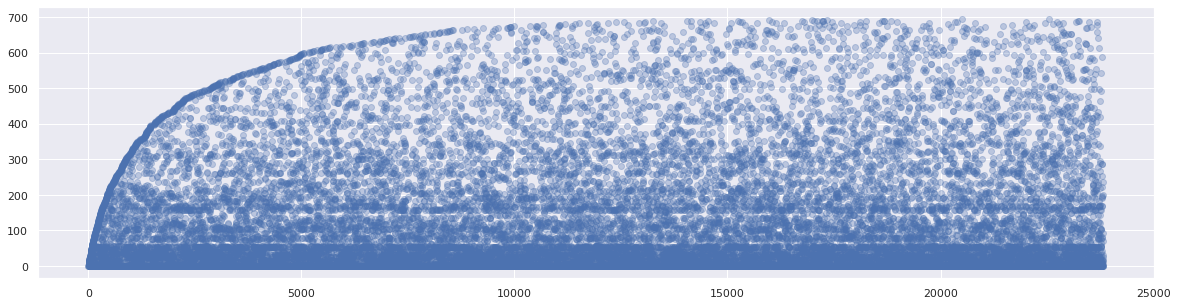

In [65]:
plt.figure(figsize=(20, 5))
plt.plot(groups, 'o', alpha=0.3)

In [78]:
df_group = train_scored[['sig_id']].copy()
df_group['group'] = groups.astype(int)
df_group

,sig_id,group
0,id_000644bb2,0
1,id_000779bfc,1
2,id_000a6266a,2
3,id_0015fd391,1
4,id_001626bd3,3
...,...,...
23809,id_fffb1ceed,26
23810,id_fffb70c0c,237
23811,id_fffc1c3f4,1
23812,id_fffcb9e7c,5


In [90]:
train_features_group = train_features.copy()
train_features_group['group'] = groups.astype(int)

<br>

save

In [88]:
filename = f'../data_ignore/output_nb/nb{NB}/group.csv'

file_dir = os.path.dirname(filename)
if not os.path.exists(file_dir):
    os.makedirs(file_dir)
df_group.to_csv(filename, index=False)

In [91]:
filename = f'../data_ignore/output_nb/nb{NB}/train_features_group.csv'
train_features_group.to_csv(filename, index=False)

In [92]:
train_features_group

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2  \
0      id_000644bb2       trt_cp       24      D1  1.0620  0.5577 -0.2479   
1      id_000779bfc       trt_cp       72      D1  0.0743  0.4087  0.2991   
2      id_000a6266a       trt_cp       48      D1  0.6280  0.5817  1.5540   
3      id_0015fd391       trt_cp       48      D1 -0.5138 -0.2491 -0.2656   
4      id_001626bd3       trt_cp       72      D2 -0.3254 -0.4009  0.9700   
...             ...          ...      ...     ...     ...     ...     ...   
23809  id_fffb1ceed       trt_cp       24      D2  0.1394 -0.0636 -0.1112   
23810  id_fffb70c0c       trt_cp       24      D2 -1.3260  0.3478 -0.3743   
23811  id_fffc1c3f4  ctl_vehicle       48      D2  0.3942  0.3756  0.3109   
23812  id_fffcb9e7c       trt_cp       24      D1  0.6660  0.2324  0.4392   
23813  id_ffffdd77b       trt_cp       72      D1 -0.8598  1.0240 -0.1361   

          g-3     g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11  \
0     -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530   
1      0.0604  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201   
2     -0.0764 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631   
3      0.5288  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584   
4      0.6919  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23809 -0.5080 -0.4713  0.7201  0.5773  0.3055 -0.4726  0.1269  0.2531  0.1730   
23810  0.9905 -0.7178  0.6621 -0.2252 -0.5565  0.5112  0.6727 -0.1851  2.8650   
23811 -0.7389  0.5505 -0.0159 -0.2541  0.1745 -0.0340  0.4865 -0.1854  0.0716   
23812  0.2044  0.8531 -0.0343  0.0323  0.0463  0.4299 -0.7985  0.5742  0.1421   
23813  0.7952 -0.3611 -3.6750 -1.2420  0.9146  3.0790  1.2460  1.9460  1.4370   

         g-12    g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20  \
0      0.5574 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688   
1     -0.0958  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449   
2     -0.0366 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799   
3     -0.8511 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200   
4     -0.9577  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23809 -0.4532 -1.0790  0.2474 -0.4550  0.3588  0.1600 -0.7362 -0.1103  0.8550   
23810 -0.2140 -0.6153  0.8362  0.5584 -0.2589  0.1292  0.0148  0.0949 -0.2182   
23811  0.1729 -0.0434  0.1542 -0.2192 -0.0302 -0.4218  0.4057 -0.5372  0.1521   
23812  2.2700  0.2046  0.5363 -1.7330  0.1450  0.6097  0.2024  0.9865 -0.7805   
23813  2.9780  2.2370 -0.6818  0.6870 -1.1060  0.0182 -0.9247 -0.0738 -0.1919   

         g-21    g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29  \
0     -1.1360 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819   
1     -0.1646 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161   
2     -0.8181 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870   
3     -1.1580 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890   
4     -0.2685  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23809 -0.4139  0.5541  0.2310 -0.5573 -0.4397 -0.9260 -0.2424 -0.6686  0.2326   
23810 -0.9235  0.0749 -1.5910 -0.8359 -0.9217  0.3013  0.1716  0.0880  0.1842   
23811 -0.2651  0.2310 -0.8101  0.4943  0.6905 -0.3720 -1.4110  0.4516  1.2300   
23812  0.9608  0.3440  2.7650  0.4925  0.6698  0.2374 -0.3372  0.8771 -2.6560   
23813 -0.7722 -1.4050 -1.0050 -1.1170 -0.5293 -1.1720 -0.2885  0.1599 -0.4250   

         g-30    g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38  \
0      0.2934 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119   
1     -

# Analysis

In [97]:
bools = train_features['cp_type'] == 'trt_cp'
df_trt = df_group[bools]

In [116]:
print(len(df_trt))
df_trt['group'].value_counts()[:30]

21948


1      3664
13      718
25      363
53      337
47      328
54      310
5       304
38      295
30      293
80      292
26      288
52      283
10      263
34      255
3       251
157     240
28      229
105     221
20      218
56      216
16      205
35      186
40      184
168     180
110     129
76      128
116     115
33      103
160     102
82      102
Name: group, dtype: int64